<h1>Predicting Diabetes: A Machine Learning Approach</h1>

<div style="background-color:rgba(120,120,120,0.2);padding:15px;border-radius:10px;">
<div>Diabetes, a chronic medical condition characterized by elevated blood sugar levels, has become a global health concern with a significant impact on individuals and healthcare systems. According to the World Health Organization (WHO), an estimated 422 million people worldwide were living with diabetes in 2014, and the prevalence is expected to rise.</div>
</div>

<div style="background-color:rgba(120,120,120,0.2);padding:15px;border-radius:10px;">
<div>This Jupyter Notebook aims to explore and predict diabetes using a machine learning model. The dataset used for this analysis contains various health metrics and lifestyle factors. Through exploratory data analysis (EDA), we will get insights about the relationships between different features and their influence on the likelihood of diabetes. After generating the model, it will be deployed as a web app to predict the probability of a user having diabetes.</div>
</div>

<h1 style="font-size:20px;">About the dataset:</h1>
<ul>
    <li>
        <code>gender</code>: Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.
    </li>
    <br>
    <li>
        <code>age</code>: Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.
    </li>
    <br>
    <li>
        <code>hypertension</code>: Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.
    </li>
    <br>
    <li>
        <code>heart_disease</code>: Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.
    </li>
    <br>
    <li>
        <code>smoking_history</code>: Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.
    </li>
    <br>
    <li>
        <code>bmi</code>: BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.
    </li>
    <br>
    <li>
        <code>HbA1c_level</code>: HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.
    </li>
    <br>
    <li>
        <code>blood_glucose_level</code>: Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.
    </li>
    <br>
    <li>
        <code>diabetes</code>: Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.
    </li>
</ul>
<p>The dataset can be found at <a hred='https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset'>https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset</a></p>
<hr>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

<h1>Exploratory Data Analysis</h1>

In [2]:
# Reading the data
df = pd.read_csv('./data/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.shape

(100000, 9)

<div>There are 100000 rows and 9 columns</div>

In [28]:
# Categorical features
cat_features = ['gender','hypertension','heart_disease','smoking_history']

# Numerical features
num_features = df.drop(columns=cat_features + ['diabetes']).columns.tolist()

# Target variable
target = 'diabetes'

print(cat_features, num_features, target)

['gender', 'hypertension', 'heart_disease', 'smoking_history'] ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'] diabetes


<h2>Checking missing data and duplicated values</h2>

In [6]:
# Checking missind data per column
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<div>None of the columns have missing data</div>
<div>The command above just showed that there are no NaN values in the dataset. We saw in the <code>df.head()</code> command that the <code>smoking_history</code> column has a <i>No Info</i> value. This will be addressed later</div>

<h2>Checking duplicated data</h2>

In [7]:
# Counting how many rows are duplicated
df.duplicated().sum()

3854

In [8]:
# Getting the dataframe without duplicated rows
df = df.drop_duplicates()

In [9]:
# The new dataframe shape
df.shape

(96146, 9)

<h2>Checking the unique values for the columns</h2>

In [10]:
# Unique values for gender
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [11]:
# Unique values for smoking_history
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

<div>We have two categories that must be dealt with: <code>Other</code> for <code>gender</code> and <code>No Info</code> for <code>smoking_history</code></div>
<div>In order to take a decision, it is necessary to calculate the proportion of this values in their respective feature</div>

In [12]:
# Checking the proportion of the category 'Other' for the gender feature
df['gender'].value_counts(normalize=True)

gender
Female    0.584122
Male      0.415691
Other     0.000187
Name: proportion, dtype: float64

<div>The category <code>Other</code> represents only 0.0187% of the values. Since it is a very small part, it will be dropped</div>

In [ ]:
# Dropping rows with 'Other'
df = df.query("gender != 'Other'")

In [14]:
# Checking the proportion of the category 'No Info' for the smoking_history feature
df['smoking_history'].value_counts(normalize=True)

smoking_history
never          0.357804
No Info        0.342054
former         0.096736
current        0.095675
not current    0.066151
ever           0.041580
Name: proportion, dtype: float64

<div>The category <code>No Info</code> represents 34.2% of the <code>smoking_history</code> values. Since it is a large part of the instances for the column <code>smoking_history</code>, assigning a value to the category might have a big impact on the results. It will be considered as a valid category


<h2>Checking the distribution of the target and the features</h2>

In [16]:
# Checking the proportion of diabetes
df['diabetes'].value_counts(normalize=True)

diabetes
0    0.911763
1    0.088237
Name: proportion, dtype: float64

<Axes: xlabel='diabetes', ylabel='count'>

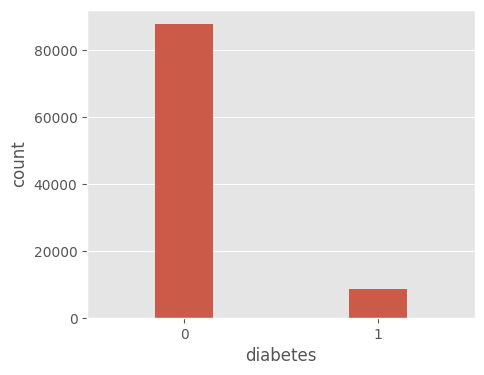

In [25]:
# Plotting diabetes distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='diabetes',width=0.3)

<div>We can see that the dataset is unbalanced, with diabetes representing 8.8% of the instances. This unbalance can cause problems when developing the machine learning model, as the model might learn just to predict the majority class. The issue of imbalance will be addressed during the model development phase.<div>

<h2>Feature <code>gender</code><h2>

In [32]:
# Proportion for Male and Female
df['gender'].value_counts(normalize=True)

gender
Female    0.584231
Male      0.415769
Name: proportion, dtype: float64

In [38]:
# Checking the diabetes for gender
df[['gender','diabetes']].groupby(by='gender').agg(['mean','count'])

diabetes       
            mean  count
gender                 
Female  0.079183  56161
Male    0.100958  39967

<Axes: xlabel='gender', ylabel='count'>

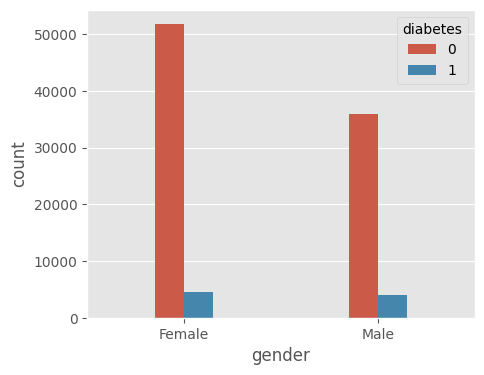

In [34]:
# Plotting gender distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='gender',width=0.3, hue='diabetes')

<div>Diabetes occurrence was higher among <i>Males</i> (10%) when compared with <i>Females</i> (7%)<div>

<h2>Feature <code>hypertension</code><h2>

In [39]:
# Proportion for hypertension
df['hypertension'].value_counts(normalize=True)

hypertension
0    0.922385
1    0.077615
Name: proportion, dtype: float64

In [40]:
# Checking the diabetes mean and count for hypertension
df[['hypertension','diabetes']].groupby(by='hypertension').agg(['mean','count'])

diabetes       
                  mean  count
hypertension                 
0             0.072135  88667
1             0.279587   7461

<Axes: xlabel='hypertension', ylabel='count'>

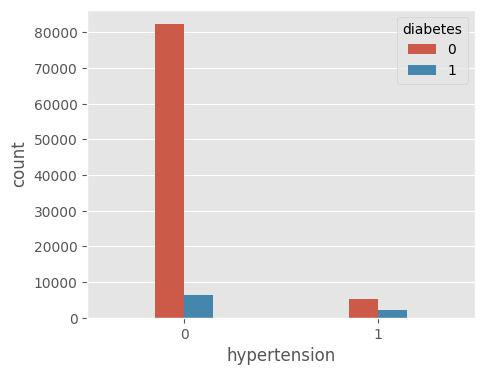

In [42]:
# Plotting hypertension distribution
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='hypertension',width=0.3, hue='diabetes')

<div>Diabetes occurrence was higher among people with <code>hypertension</code> (28%) when compared with people without <code>hypertension</code> (7%)<div>

<h2>Feature <code>heart_disease</code><h2>

In [44]:
# Proportion for heart_disease
df['heart_disease'].value_counts(normalize=True)

heart_disease
0    0.95919
1    0.04081
Name: proportion, dtype: float64

In [46]:
# Checking the diabetes mean and count for heart_disease
df[['heart_disease','diabetes']].groupby(by='heart_disease').agg(['mean','count'])

diabetes       
                   mean  count
heart_disease                 
0              0.078250  92205
1              0.322967   3923

<div>Diabetes occurrence was higher among people with <code>heart_disease</code> (32%) when compared with people without <code>heart_disease</code> (7.8%)<div>